In [2]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from pyHalo.preset_models import preset_model_from_name

### Cold dark matter (CDM)

The CDM preset model currently implements, with default settings, a line-of-sight mass function modeled as a Sheth-Tormen mass function, together with a power law subhalo mass function with arbitrary normalization and logarithmic slope. The defalt concentration-mass relation is that of Diemer & Joyce (2019) https://ui.adsabs.harvard.edu/abs/2019ApJ...871..168D/abstract

The main keyword arguments for this model are: 
1) sigma_sub: the amplitude of the subhalo mass function at 10^8 M_sun; units kpc^-2. See Gilman et al. (2020) for details https://ui.adsabs.harvard.edu/abs/2020MNRAS.491.6077G/abstract
2) LOS_normalization: the amplitude of the line-of-sight mass function relative to the Sheth-Tormen prediction, i.e. LOS_normalization = 1.0 is exactly Sheth-Tormen, and LOS_normalization = 0 removes LOS halos
3) log_m_host: the logarithm (base 10) of the host halo mass; this affects the number of subhalos and the number of halos added through correlated structure around the host
4) shmf_log_slope: the logarithmic slope of the subhalo mass function pivoting around 10^8

For additional details, see the doucmentation in the function. 

In [3]:
zlens, zsource = 0.5, 2.0
# for visualization purposes we will turn off scatter in the concentration-mass relation; default is 0.2 dex
kwargs_concentration_model_subhalos = {'scatter': False}
kwargs_concentration_model_fieldhalos = {'scatter': False}
CDM = preset_model_from_name('CDM')
realizationCDM = CDM(zlens, zsource, cone_opening_angle_arcsec=6, sigma_sub=0.0,
                    kwargs_concentration_model_subhalos=kwargs_concentration_model_subhalos,
                    kwargs_concentration_model_fieldhalos=kwargs_concentration_model_fieldhalos,
                    geometry_type='DOUBLE_CONE', log_m_host=13.0)
print('realization contains '+str(len(realizationCDM.halos))+' halos.')
realizationCDM = CDM(zlens, zsource, cone_opening_angle_arcsec=6, sigma_sub=0.006, LOS_normalization=0.0,
                    kwargs_concentration_model_subhalos=kwargs_concentration_model_subhalos,
                    kwargs_concentration_model_fieldhalos=kwargs_concentration_model_fieldhalos,
                    geometry_type='DOUBLE_CONE', log_m_host=13.0)
print('realization contains '+str(len(realizationCDM.halos))+' halos.')


realization contains 2766 halos.
realization contains 448 halos.


realization contains 28099 halos.


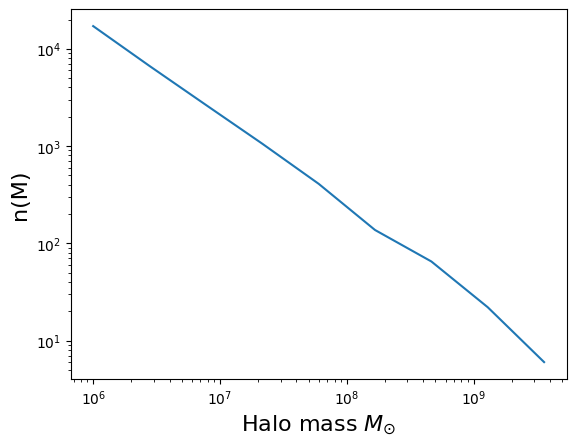

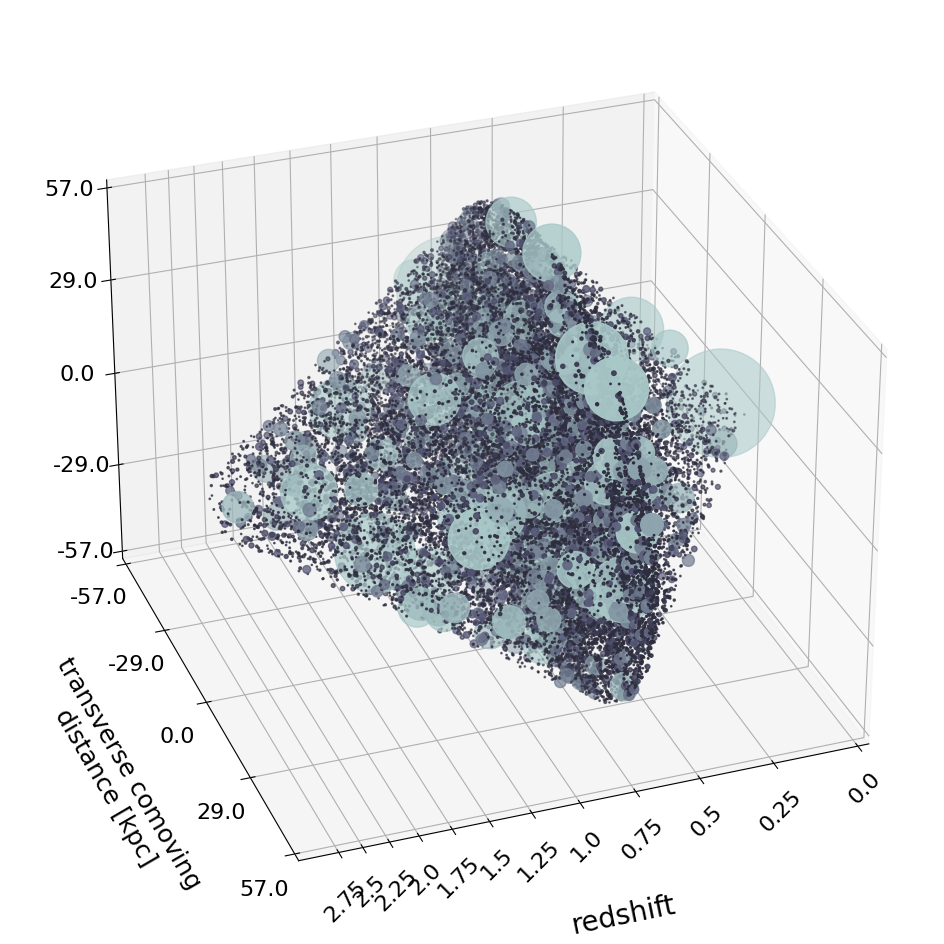

In [4]:
zlens, zsource = 0.7, 3.0
# for visualization purposes we will turn off scatter in the concentration-mass relation; default is 0.2 dex
kwargs_concentration_model_subhalos = {'scatter': False}
kwargs_concentration_model_fieldhalos = {'scatter': False}
realizationCDM = CDM(zlens, zsource, cone_opening_angle_arcsec=10,
                    kwargs_concentration_model_subhalos=kwargs_concentration_model_subhalos,
                    kwargs_concentration_model_fieldhalos=kwargs_concentration_model_fieldhalos)
print('realization contains '+str(len(realizationCDM.halos))+' halos.')
cdm_halo_masses = [halo.mass for halo in realizationCDM.halos]
N, m = np.histogram(cdm_halo_masses, bins=np.logspace(6, 10, 10))

fig = plt.figure(1)
ax = plt.subplot(111)
ax.loglog(m[0:-1], N)
ax.set_xlabel('Halo mass '+r'$M_{\odot}$', fontsize=16)
ax.set_ylabel('n(M)', fontsize=16)

fig = plt.figure(2)
fig.set_size_inches(14,12)
ax = plt.subplot(111, projection='3d')
realizationCDM.plot(ax)

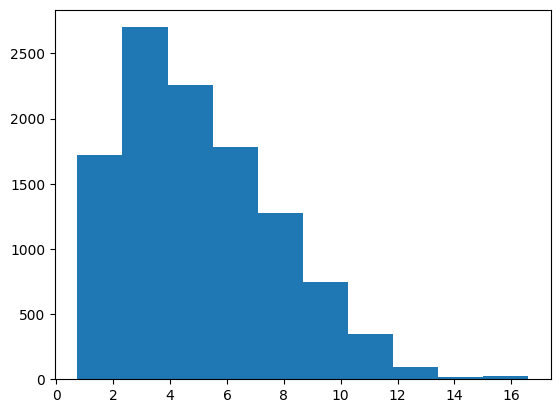

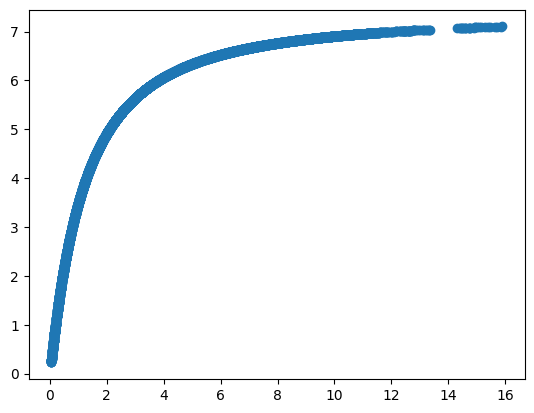

(array([ 129.,  146.,  177.,  225.,  350.,  549., 1000., 1779., 3001.,
        3611.]),
 array([0.22808496, 0.91571606, 1.60334717, 2.29097828, 2.97860939,
        3.66624049, 4.3538716 , 5.04150271, 5.72913382, 6.41676492,
        7.10439603]),
 <BarContainer object of 10 artists>)

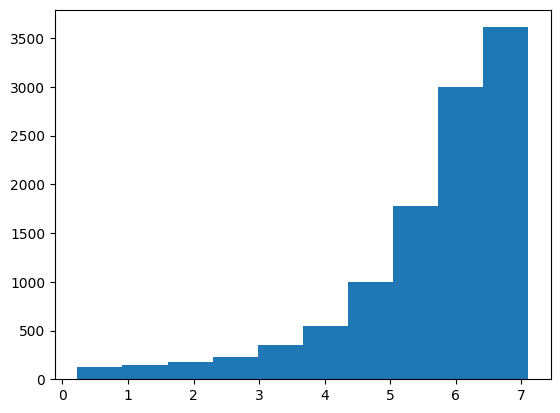

In [5]:
accretion_redshift = []
time_since_infall = []
for halo in realizationCDM.halos:
    if halo.is_subhalo:
        zinfall = halo.z_eval
        t = halo.time_since_infall
        accretion_redshift.append(zinfall)
        time_since_infall.append(t)

plt.hist(accretion_redshift)
plt.show()
plt.scatter(np.array(accretion_redshift)-zlens, time_since_infall)
plt.show()
plt.hist(time_since_infall)

Text(0, 0.5, 'n(M)')

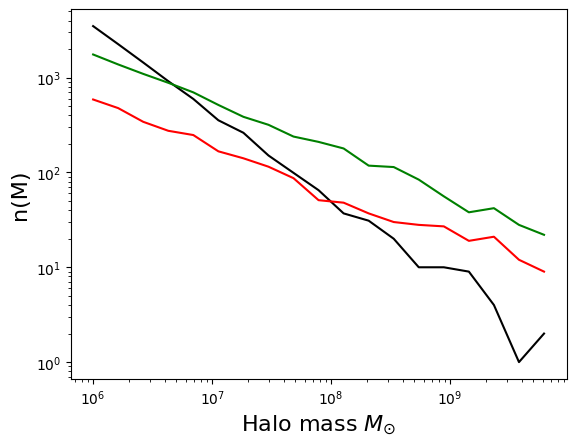

In [6]:
realizationCDM_subhalos_1 = CDM(zlens, zsource, cone_opening_angle_arcsec=6, 
                                shmf_log_slope=-1.9, LOS_normalization=0.0, sigma_sub=0.06)
realizationCDM_subhalos_2 = CDM(zlens, zsource, cone_opening_angle_arcsec=6, 
                                shmf_log_slope=-1.5, LOS_normalization=0.0, sigma_sub=0.06)
realizationCDM_subhalos_3 = CDM(zlens, zsource, cone_opening_angle_arcsec=6, 
                                shmf_log_slope=-1.5, LOS_normalization=0.0, sigma_sub=0.18)
cdm_halo_masses1 = [halo.mass for halo in realizationCDM_subhalos_1.halos]
N1, m1 = np.histogram(cdm_halo_masses1, bins=np.logspace(6, 10, 20))
cdm_halo_masses2 = [halo.mass for halo in realizationCDM_subhalos_2.halos]
N2, m2 = np.histogram(cdm_halo_masses2, bins=np.logspace(6, 10, 20))
cdm_halo_masses3 = [halo.mass for halo in realizationCDM_subhalos_3.halos]
N3, m3 = np.histogram(cdm_halo_masses3, bins=np.logspace(6, 10, 20))

fig = plt.figure(1)
ax = plt.subplot(111)
ax.loglog(m1[0:-1], N1, color='k')
ax.set_xlabel('Halo mass '+r'$M_{\odot}$', fontsize=16)
ax.set_ylabel('n(M)', fontsize=16)
ax.loglog(m2[0:-1], N2, color='r')
ax.set_xlabel('Halo mass '+r'$M_{\odot}$', fontsize=16)
ax.set_ylabel('n(M)', fontsize=16)
ax.loglog(m3[0:-1], N3, color='g')
ax.set_xlabel('Halo mass '+r'$M_{\odot}$', fontsize=16)
ax.set_ylabel('n(M)', fontsize=16)

### Concentration-mass relation

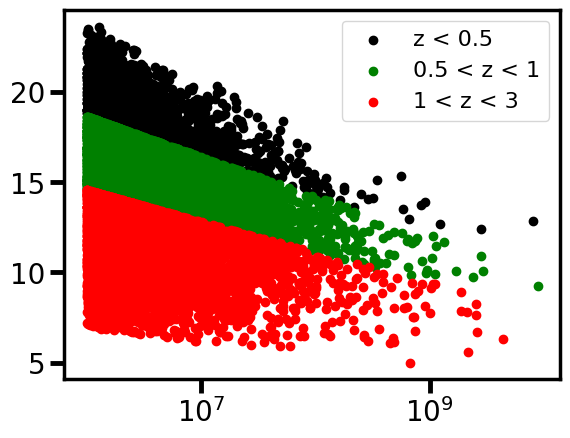

In [13]:
masses_1 = []
c_1 = []

masses_2 = []
c_2 = []

masses_3 = []
c_3 = []

z_bins = [0.5, 1., 3.0]
for halo in realizationCDM.halos:
    if halo.is_subhalo: # subhalos have a lot of scatter because their concentration is evaluated at infall
        continue
    if halo.z < z_bins[0]:
        masses_1.append(halo.mass)
        c_1.append(halo.c)
    elif halo.z < z_bins[1]:
        masses_2.append(halo.mass)
        c_2.append(halo.c)
    elif halo.z < z_bins[2]:
        masses_3.append(halo.mass)
        c_3.append(halo.c)
plt.scatter(masses_1, c_1, color='k', label='z < 0.5')
plt.scatter(masses_2, c_2, color='g', label='0.5 < z < 1')
plt.scatter(masses_3, c_3, color='r', label='1 < z < 3')
plt.legend(fontsize=16)
plt.gca().set_xscale('log')